In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV 

from sklearn import tree
from sklearn import linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from tqdm import tqdm
import time

import warnings
warnings.simplefilter("ignore")

# Подгружаем файлы 

In [2]:
sourse_train = pd.read_csv('train.csv')
sourse_test = pd.read_csv('test.csv')

In [3]:
sourse_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
sourse_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
sourse_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
sourse_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
sourse_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
sourse_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Отбор данных

In [9]:
X = sourse_train[['Pclass', 'Sex', 'Age','SibSp', 'Parch', 'Fare', 'Embarked']]
# можно было бы предобработать имя и сделать колонку с длиной имени
y = sourse_train.Survived

print(X.shape)
print(y.shape)

(891, 7)
(891,)


In [10]:
X = pd.get_dummies(X) 
X.shape

(891, 10)

In [11]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


# Избавляемся от пустых значений 

In [12]:
X.isnull().sum()

Pclass          0
Age           177
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Embarked_C      0
Embarked_Q      0
Embarked_S      0
dtype: int64

## Обрабатываем возраст, строю модель по предсказанию возроста

In [13]:
# Отбираю данные для обучения модели 
age_train_X = X.dropna().drop(['Age'], axis=1)
age_train_y = X.dropna()['Age']
# Делаем модель
clf = linear_model.LinearRegression()
clf.fit(age_train_X, age_train_y)

LinearRegression()

In [14]:
def age_fill(x, model):
    '''Функция проверяет наличие возроста и при отсутствии заполняет его предсказанием'''
    if list(pd.isna(x['Age']))[0]:
        pr = clf.predict(x.drop(['Age'], axis=1))[0]
        if pr<0:
            return 2
        elif pr>100:
            return 100
        else:
            return round(pr)
    else:
        return list(x['Age'])[0]


In [15]:
# Создаем список всех возростов
age_list = []
for i in X.index:
    s = age_fill(X.iloc[i:i+1], clf)
    age_list.append(s)
len(age_list)

891

In [16]:
# Заполняем колонку
X['Age'] = age_list

In [17]:
# Проверка 
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

# Графики

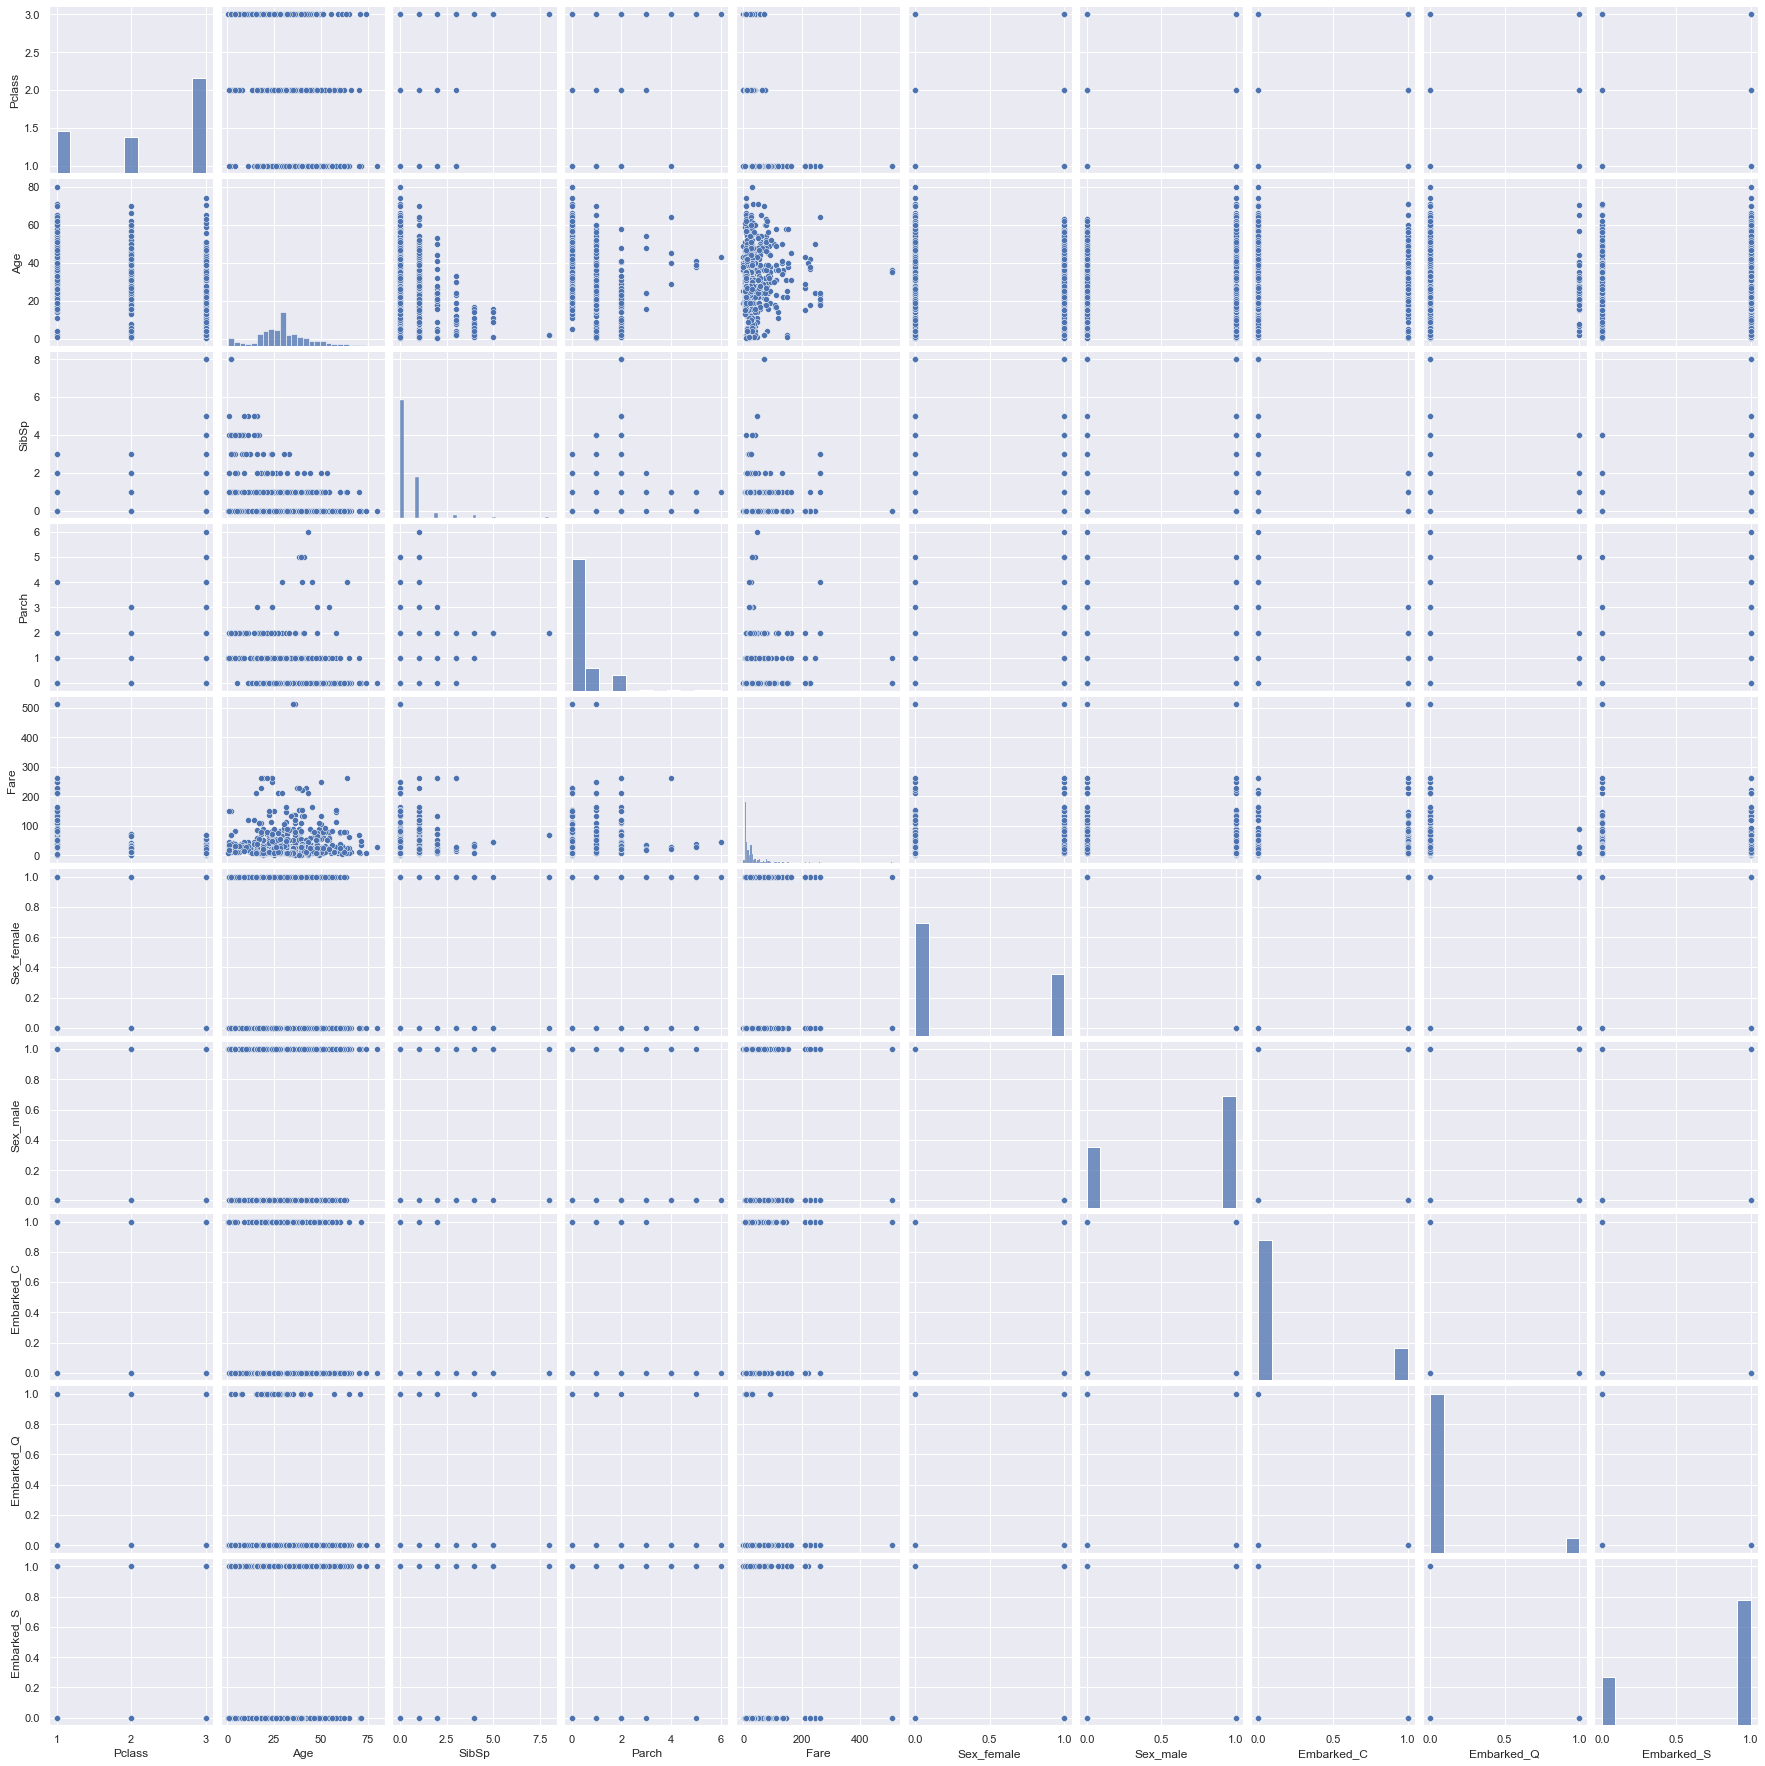

In [18]:
#scatterplot
sns.set()
cols = ['Pclass', 'Age', 'SibSp', 'Parch',
        'Fare', 'Sex_female', 'Sex_male',
        'Embarked_C', 'Embarked_Q', 'Embarked_S']
sns.pairplot(X[cols], size = 2.5)
plt.show();

Pclass


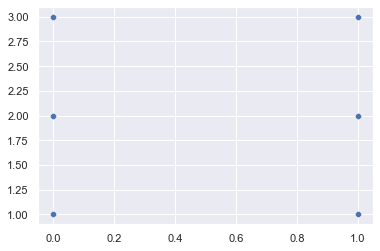

Age


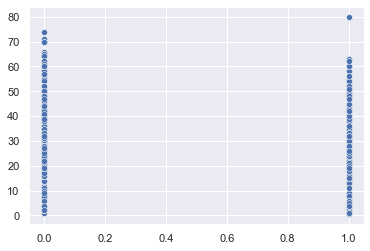

SibSp


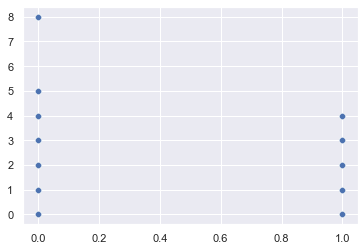

Parch


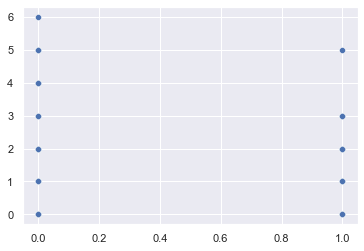

Fare


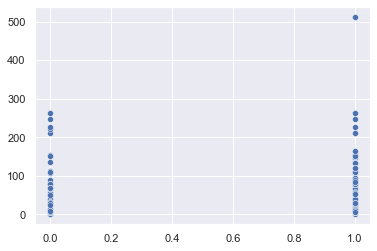

Sex_female


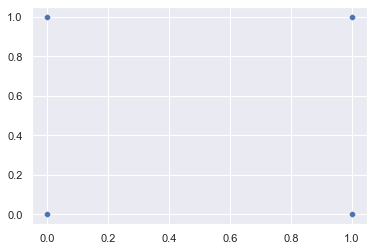

Sex_male


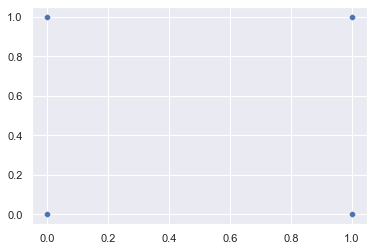

Embarked_C


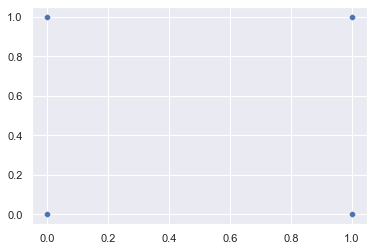

Embarked_Q


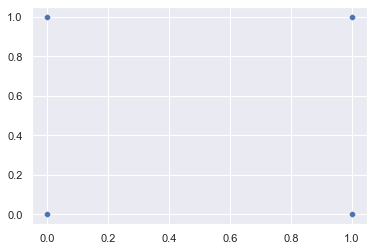

Embarked_S


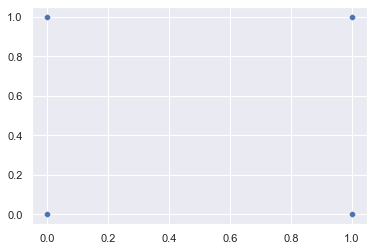

In [19]:
for i in X.columns:
    print(i)
    sns.scatterplot(list(y), list(X[i]))
    plt.show()

Pclass


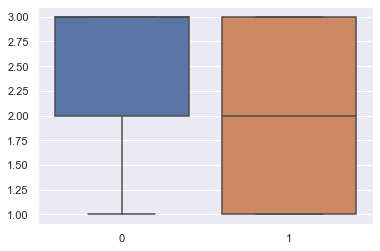

Age


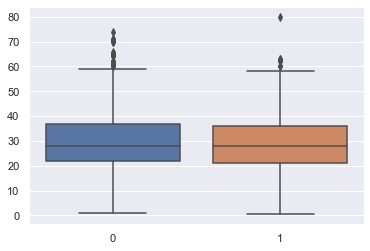

SibSp


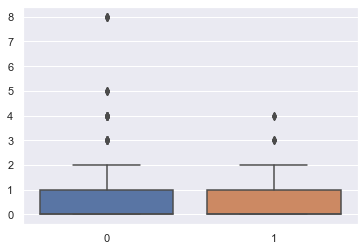

Parch


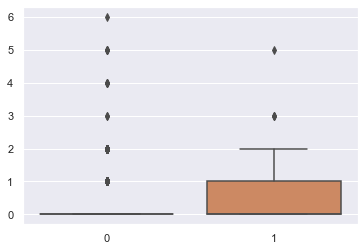

Fare


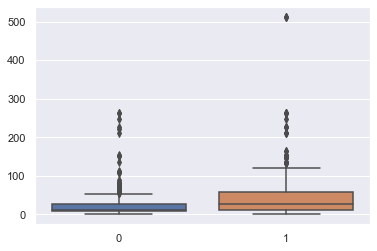

Sex_female


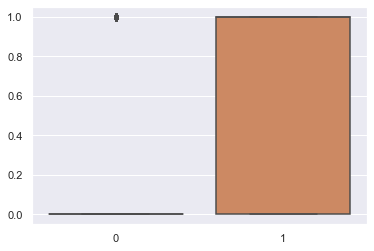

Sex_male


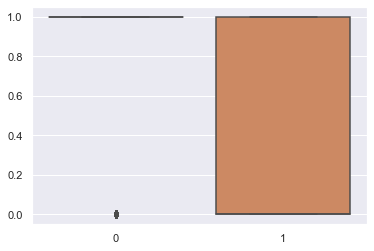

Embarked_C


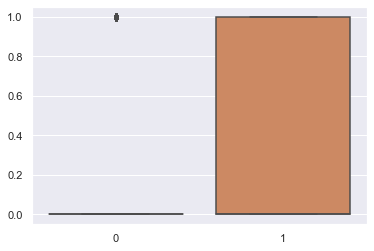

Embarked_Q


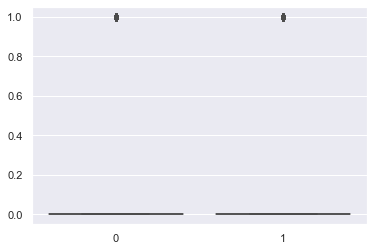

Embarked_S


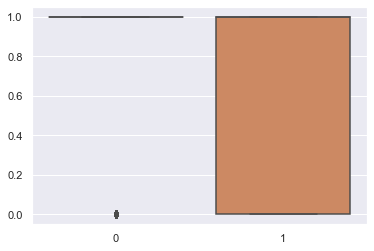

In [20]:
for i in X.columns:
    print(i)
    sns.boxplot(list(y), list(X[i]))
    plt.show()

Pclass


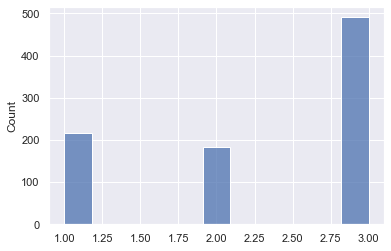

Age


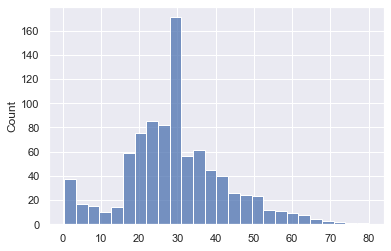

SibSp


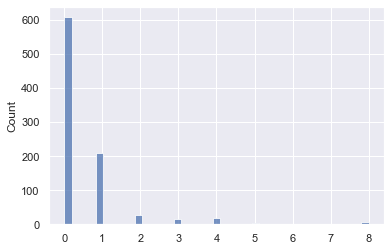

Parch


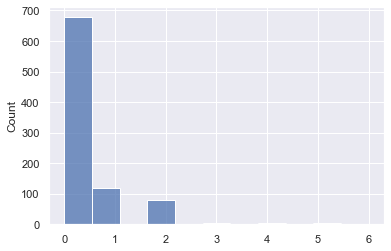

Fare


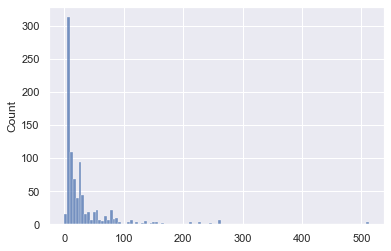

Sex_female


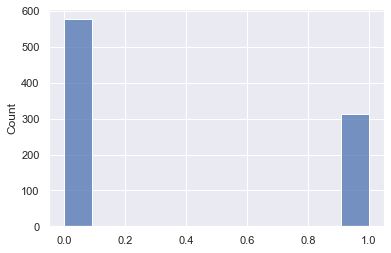

Sex_male


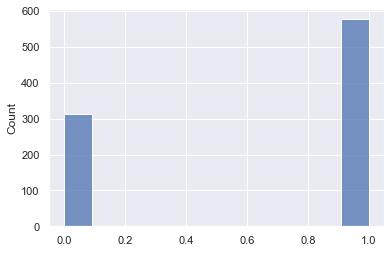

Embarked_C


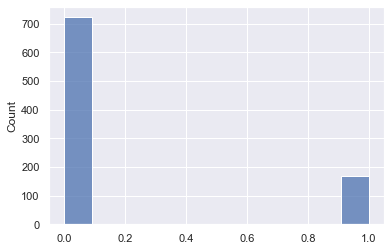

Embarked_Q


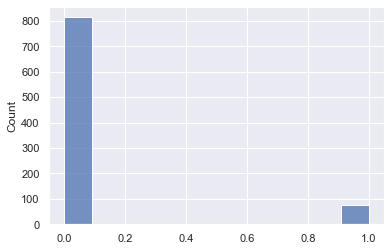

Embarked_S


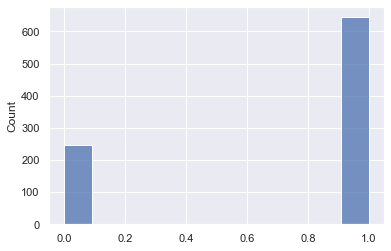

In [21]:
for i in X.columns:
    print(i)
    sns.histplot(list(X[i]))
    plt.show()

# Построение модели 

In [22]:
rs = 42

### Разбивка 

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = rs)

### Модели

In [55]:
clf_tree = tree.DecisionTreeClassifier(random_state = rs)
clf_tree_reg = tree.DecisionTreeRegressor(max_depth=4,  random_state = rs)
clf_Ridge = linear_model.Ridge(alpha=1, random_state = rs)
clf_Lasso= linear_model.Lasso(alpha=1, random_state = rs)
clf_linear = linear_model.LinearRegression()
clf_log_reg = linear_model.LogisticRegression('l2')
clf_knn = KNeighborsClassifier()
clf_SVM = SVC()

list_clf = [clf_tree, clf_tree_reg, clf_Ridge, clf_Lasso, clf_linear, clf_knn, clf_SVM, clf_log_reg]

In [56]:
def baseline_fit(clf, X=X_train, y=y_train, X_t=X_test, y_t=y_test):
    clf.fit(X, y)
    print('score')
    print(clf.score(X_t, y_t))
    print('cross_val_score')
    print(np.mean(cross_val_score(i, X, y, cv=5)))

In [57]:
for i in list_clf:
    print(i)
    baseline_fit(i,  X=X_train, y=y_train, X_t=X_test, y_t=y_test)
    print('---------------------------------------------------')

DecisionTreeClassifier(random_state=42)
score
0.7457627118644068
cross_val_score
0.7466806722689074
---------------------------------------------------
DecisionTreeRegressor(max_depth=4, random_state=42)
score
0.3709712571283169
cross_val_score
0.3283077484761061
---------------------------------------------------
Ridge(alpha=1, random_state=42)
score
0.4459669370160675
cross_val_score
0.34469781094388674
---------------------------------------------------
Lasso(alpha=1, random_state=42)
score
0.07060778753798647
cross_val_score
0.04382851209170009
---------------------------------------------------
LinearRegression()
score
0.4463065658843941
cross_val_score
0.3444970992681265
---------------------------------------------------
KNeighborsClassifier()
score
0.7322033898305085
cross_val_score
0.7030112044817928
---------------------------------------------------
SVC()
score
0.6576271186440678
cross_val_score
0.6727731092436975
---------------------------------------------------
LogisticR

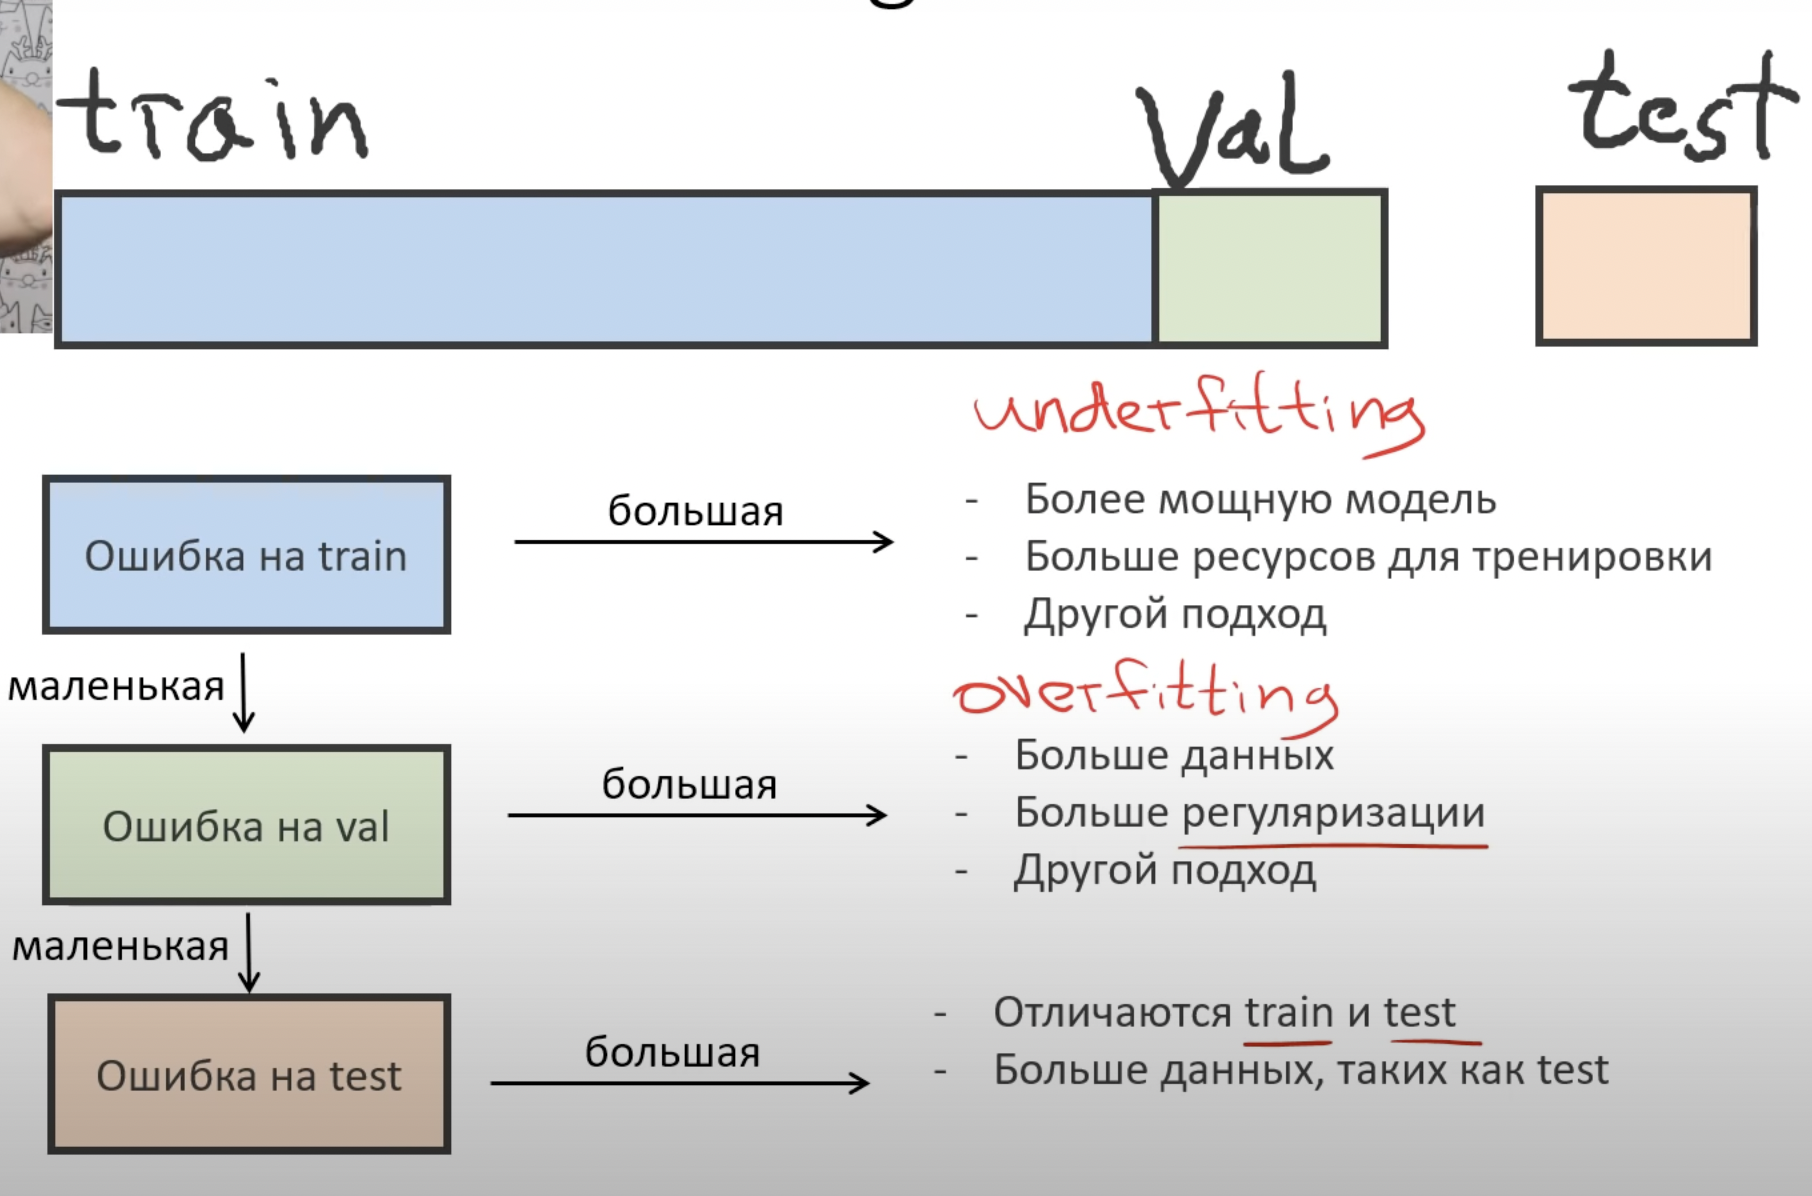

In [27]:
grid_search_cv_clf = GridSearchCV(clf_tree, {'criterion':['gini', 'entropy'], 'max_depth': range(1,30)}, n_jobs=-1)
grid_search_cv_clf.fit(X, y)
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 7}

In [42]:
grid_search_cv_log_clf = GridSearchCV(linear_model.LogisticRegression('l2'),
                                      {'penalty':['l1', 'l2'],}, n_jobs=-1)
grid_search_cv_log_clf.fit(X, y)
print(grid_search_cv_log_clf.score(X, y))
print(grid_search_cv_log_clf.score(X_train, y_train))
print(grid_search_cv_log_clf.best_params_)

0.8080808080808081
0.7986577181208053
{'penalty': 'l2'}


/Users/danilaandreev/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/danilaandreev/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/danilaandreev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/danilaandreev/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this t

In [28]:
clf_RF = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=7)
clf_RF.fit(X_train, y_train)
clf_RF.score(X_test, y_test)

0.7966101694915254

In [29]:
start_time = time.time()

GS_clf_RF = GridSearchCV(RandomForestClassifier(),
                         {'criterion':['entropy'],
                          'max_depth': [9],
                          'n_estimators':range(85, 150)}, 
                        n_jobs=-1)
GS_clf_RF.fit(X, y)
print(GS_clf_RF.best_params_)
print(GS_clf_RF.score(X,y))
# cvs = cross_val_score(GS_clf_RF, X, y, cv=10)
# print(cvs)
# print(np.mean(cvs))

print("--- %s seconds ---" % (time.time() - start_time))

{'criterion': 'entropy', 'max_depth': 9, 'n_estimators': 112}
0.9124579124579124
--- 7.758330821990967 seconds ---


In [30]:
best_clf_RF = RandomForestClassifier(criterion='entropy', max_depth=9, n_estimators=107)
best_clf_RF.fit(X_train, y_train)
best_clf_RF.score(X_test, y_test)

0.8135593220338984